<a href="https://colab.research.google.com/github/Camilo899/FundamenteoDeepLearnig/blob/main/01-%20exploraci%C3%B3n%20de%20datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploración de Datos**

## Importar bibliotecas y montar Google Drive.

---



In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Montar Google Drive (esto es necesario para acceder al conjunto de datos)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- **Nota**: Los datos fueron sacaron de una base de datos hospedada en Kaggle en el siguiente enlace: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition

## Cargar las rutas de las imágenes y etiquetas.

---



In [ ]:
# Rutas a las carpetas de entrenamiento, validación y prueba
train_dir = '/content/drive/MyDrive/UDEA/2023-02/FundamentosDeepLearning/Proyecto/train'
val_dir = '/content/drive/MyDrive/UDEA/2023-02/FundamentosDeepLearning/Proyecto/val'
test_dir = '/content/drive/MyDrive/UDEA/2023-02/FundamentosDeepLearning/Proyecto/test'

# Obtener rutas a las imágenes de entrenamiento
train_image_paths = [os.path.join(train_dir, category, img) for category in os.listdir(train_dir) for img in os.listdir(os.path.join(train_dir, category))]

# Etiquetas (supongamos que los nombres de las carpetas son las etiquetas)
labels = os.listdir(train_dir)

# Mapeo de etiquetas a números
label_to_index = {label: index for index, label in enumerate(labels)}

# Obtener etiquetas para las imágenes de entrenamiento
train_labels = [label_to_index[img.split('/')[-2]] for img in train_image_paths]


## Preprocesamiento de imágenes

---



In [ ]:
# Crear generadores de imágenes para entrenamiento y validación
batch_size = 32
image_size = (128, 128)

train_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=image_size, batch_size=batch_size, class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_generator = val_datagen.flow_from_directory(val_dir, target_size=image_size, batch_size=batch_size, class_mode='categorical')


Found 3019 images belonging to 5 classes.
Found 649 images belonging to 5 classes.


##  Creando un modelo de CNN para clasificación

---



In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(labels), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


## Entrenando el modelo

---



In [ ]:
epochs = 10
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)

Epoch 1/10
95/95 [==============================] - 88s 934ms/step - loss: 1.0439 - accuracy: 0.5846 - val_loss: 1.0453 - val_accuracy: 0.6040
Epoch 2/10
95/95 [==============================] - 12s 131ms/step - loss: 0.8488 - accuracy: 0.6761 - val_loss: 0.9957 - val_accuracy: 0.6133
Epoch 3/10
95/95 [==============================] - 13s 139ms/step - loss: 0.6810 - accuracy: 0.7400 - val_loss: 1.0257 - val_accuracy: 0.6256
Epoch 4/10
95/95 [==============================] - 13s 133ms/step - loss: 0.5242 - accuracy: 0.7986 - val_loss: 1.0334 - val_accuracy: 0.6394
Epoch 5/10
95/95 [==============================] - 13s 132ms/step - loss: 0.3185 - accuracy: 0.8877 - val_loss: 1.0354 - val_accuracy: 0.6502
Epoch 6/10
95/95 [==============================] - 14s 149ms/step - loss: 0.1790 - accuracy: 0.9437 - val_loss: 1.3446 - val_accuracy: 0.6672
Epoch 7/10
95/95 [==============================] - 12s 131ms/step - loss: 0.0898 - accuracy: 0.9765 - val_loss: 1.5551 - val_accuracy: 0.6857

## Preparando los datos de prueba y realizando predicciones

---



In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0) # Normalización
test_generator = test_datagen.flow_from_directory(test_dir, target_size=image_size, batch_size=batch_size, class_mode=None, shuffle=False)

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(test_generator)

# Obtener las etiquetas predichas (índices de clases)
predicted_labels = np.argmax(predictions, axis=1)

Found 649 images belonging to 5 classes.
21/21 [==============================] - 129s 6s/step


In [ ]:
# Cargar las imágenes nuevas
nuevas_imagenes_dir = test_dir
nuevas_imagenes_datagen = ImageDataGenerator(rescale=1./255)
nuevas_imagenes_generator = nuevas_imagenes_datagen.flow_from_directory(
        nuevas_imagenes_dir,
        target_size=(128, 128),
        batch_size=20,
        class_mode='categorical')

# Hacer predicciones
#predicciones = model.predict(nuevas_imagenes_generator)

# Imprimir las predicciones
#print(predicciones)


# Hacer predicciones
predicciones = model.predict(nuevas_imagenes_generator)

# Obtener las clases de las imágenes
clases = nuevas_imagenes_generator.classes

# Obtener los nombres de las clases
nombres_clases = nuevas_imagenes_generator.class_indices

# Invertir el diccionario de nombres de clases
nombres_clases = {v: k for k, v in nombres_clases.items()}

# Imprimir las predicciones por categorías y número
for i in range(len(predicciones)):
    indice_prediccion = tf.argmax(predicciones[i]).numpy()
    nombre_prediccion = nombres_clases[indice_prediccion]
    print(f'Imagen {i}: {nombre_prediccion} índice {indice_prediccion}')


Found 649 images belonging to 5 classes.
33/33 [==============================] - 2s 57ms/step
Imagen 0: sunflower índice 3
Imagen 1: daisy índice 0
Imagen 2: dandelion índice 1
Imagen 3: daisy índice 0
Imagen 4: daisy índice 0
Imagen 5: dandelion índice 1
Imagen 6: dandelion índice 1
Imagen 7: daisy índice 0
Imagen 8: sunflower índice 3
Imagen 9: tulip índice 4
Imagen 10: tulip índice 4
Imagen 11: dandelion índice 1
Imagen 12: tulip índice 4
Imagen 13: sunflower índice 3
Imagen 14: sunflower índice 3
Imagen 15: tulip índice 4
Imagen 16: dandelion índice 1
Imagen 17: sunflower índice 3
Imagen 18: daisy índice 0
Imagen 19: tulip índice 4
Imagen 20: tulip índice 4
Imagen 21: daisy índice 0
Imagen 22: tulip índice 4
Imagen 23: tulip índice 4
Imagen 24: tulip índice 4
Imagen 25: rose índice 2
Imagen 26: sunflower índice 3
Imagen 27: daisy índice 0
Imagen 28: dandelion índice 1
Imagen 29: daisy índice 0
Imagen 30: sunflower índice 3
Imagen 31: sunflower índice 3
Imagen 32: tulip índice 4
Im

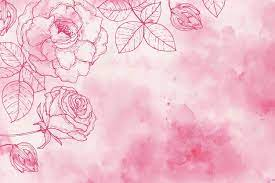

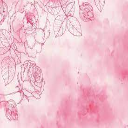

1

In [ ]:
from google.colab.patches import cv2_imshow
import cv2


image = cv2.imread('/content/drive/MyDrive/UDEA/2023-02/FundamentosDeepLearning/Proyecto/IMG/R_2.jpg')

cv2_imshow(image)
image = cv2.resize(image, (128, 128))
cv2_imshow(image)

image = image / 255
image

image.shape

image = image.reshape(-1, 128, 128, 3)
image.shape

result = model(image)
result = np.argmax(result)
result
